## Models Subset

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com
### Date: Nov.8th, 2023

### Table of Contents
- [Data Dictionary](#Data-Dictionary)
- [Linear Regression](#Linear-Regression)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [Compare Models](#Compare-Models)

### Data Dictionary
| Column Name                | Description                                                                                                                       | DataTypes |
|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------|
| invoice_and_item_number    | Concatenated invoice and line number associated with the liquor sold. This provides a unique identifier for the individual liquor products included in the store's sales. | object     |
| date                       | Date of sale.                                                                                                                     | object     |
| store_number               | Unique number assigned to the store that sold the liquor.                                                                         | int64      |
| store_name                 | Name of the store that sold the liquor.                                                                                            | object     |
| address                    | Address of the store that sold the liquor.                                                                                        | object     |
| city                       | City where the store that sold the liquor is located.                                                                             | object     |
| zip_code                   | ZIP code where the store that sold the liquor is located.                                                                         | float64    |
| county_number              | Iowa county number for the county where the store that sold the liquor is located.                                             | float64    |
| county                     | County where the store that sold the liquor is located.                                                                           | object     |
| category                   | Category code associated with the liquor sold.                                                                                    | float64    |
| category_name              | Category of the liquor sold.                                                                                                      | object     |
| vendor_number              | The vendor number of the company for the brand of liquor sold.                                                                    | float64    |
| vendor_name                | The vendor name of the company for the brand of liquor sold.                                                                      | object     |
| item_number                | Item number for the individual liquor product sold.                                                                               | int64      |
| item_description           | Description of the individual liquor product sold.                                                                               | object     |
| pack                       | The number of bottles in a case for the liquor sold.               | int64      |
| bottle_volume_ml           | Volume of each liquor bottle sold in milliliters.                         | int64      |
| Alcohol_Type           | The general type of alcohol.                       | Object    |
| profit   | Total profit of liquor sold.                       | float64   |
| day     | The day of sale.                                   | object    |
| week    | The week of sale.                                  | object    |
| volume_3 | Volume of liquor in liters between 50.01 to 100L.  | uint8     |
| volume_4 | Volume of liquor in liters between 100.01 to 200L. | uint8     |
| volume_5 | Volume of liquor in liters between 200.01 to 1000 L.   | uint8     |
| volume_6 | Volume of liquor in liters larger than 1000.01 L.   | uint8     |

### 

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df9=pd.read_parquet('IowaNext.parquet')

In [4]:
df9.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category_name,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,WhiskeyLiqueur,...,0,0,0,0,0,0,1,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,CreamLiqueurs,...,0,0,0,0,0,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,ScotchWhiskies,...,0,0,0,0,0,0,0,0,0,1


###

### Linear Regression

In [9]:
plt.subplots(7, 4, figsize=(20, 15))
///
count = 1

for col in X.columns:
    plt.subplot(7, 4, count)
    sns.scatterplot(x=X[col], y=y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

From the above graph, we can see that there is no obvious linear relationship between X and y, lets see if there is high correlations between x variables.

In [ ]:
X_corr = X.corr()
X_corr

In [ ]:
plt.figure(figsize=(18, 18))  
sns.heatmap(X_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

Remove Outliers and Scale the data

In [12]:
numeric_columns = df9.select_dtypes(include=['float64', 'int64', 'uint8']).columns

In [13]:
columns_to_exclude = ['volume_3', 'volume_4', 'volume_5']

# Loop through the numeric columns and filter out outliers for columns not in the exclusion list
for column in numeric_columns:
    if column not in columns_to_exclude:
        # Calculate the mean and standard deviation for the column
        mean = df9[column].mean()
        std_dev = df9[column].std()

        # Define the cutoff for outliers (3 standard deviations from the mean)
        cutoff = std_dev * 3
        lower, upper = mean - cutoff, mean + cutoff

        # Filter out the outliers from the DataFrame
        df9 = df9[(df9[column] >= lower) & (df9[column] <= upper)]

In [14]:
numeric_columns = df9.select_dtypes(include=['float64', 'int64', 'uint8']).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
df9[numeric_columns] = scaler.fit_transform(df9[numeric_columns])

In [15]:
mean = df9['profit'].mean()
std_dev = df9['profit'].std()
cutoff = std_dev * 3  # Three standard deviations from the mean
lower, upper = mean - cutoff, mean + cutoff
# Removing outliers
data_filtered = df9[(df9['profit'] >= lower) & (df9['profit'] <= upper)]

In [16]:
X = df9[numeric_columns].drop(['profit'], axis=1)
y = df9['profit']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Add a constant term to the X matrix (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit a linear regression model with statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary statistics of the model
summary = model.summary()

In [19]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2448.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:48:06   Log-Likelihood:                -41802.
No. Observations:               37457   AIC:                         8.363e+04
Df Residuals:                   37443   BIC:                         8.375e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.004  

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_t_pred = model.predict(sm.add_constant(X_train))

# Calculate metrics for training data
t_mse = mean_squared_error(y_train, y_t_pred)
t_mae = mean_absolute_error(y_train, y_t_pred)
t_rmse = np.sqrt(t_mse)
t_r2 = r2_score(y_train, y_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t_mse}, MAE: {t_mae}, RMSE: {t_rmse}, R^2: {t_r2}")

Training Data Metrics:
MSE: 0.5455993210011686, MAE: 0.4187954597019523, RMSE: 0.7386469528815296, R^2: 0.45939708143272995


In [24]:
y_test_p = model.predict(sm.add_constant(X_test))

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_p)
test_mae = mean_absolute_error(y_test, y_test_p)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_p)

print("Test Data Metrics:")
print(f"MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}")

Test Data Metrics:
MSE: 0.5263995946202068, MAE: 0.4201401587444379, RMSE: 0.7255340065222352, R^2: 0.4533759861633311


###

Re-run the model after removing columns that have high p-values(over 0.05)

In [25]:
X1= df9[numeric_columns].drop(['profit', 'pack', 'day'], axis=1)
y1= df9['profit']

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [27]:
X1_train_with_const = sm.add_constant(X1_train)

# Fit a linear regression model with statsmodels
model1 = sm.OLS(y1_train, X1_train_with_const).fit()

# Get the summary statistics of the model
summary1 = model1.summary()

In [28]:
print(summary1)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2892.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:51:48   Log-Likelihood:                -41804.
No. Observations:               37457   AIC:                         8.363e+04
Df Residuals:                   37445   BIC:                         8.373e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.004  

In [29]:
y1_t_pred = model1.predict(sm.add_constant(X1_train))

# Calculate metrics for training data
t_mse = mean_squared_error(y1_train, y1_t_pred)
t_mae = mean_absolute_error(y1_train, y1_t_pred)
t_rmse = np.sqrt(t_mse)
t_r2 = r2_score(y1_train, y1_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t_mse}, MAE: {t_mae}, RMSE: {t_rmse}, R^2: {t_r2}")

Training Data Metrics:
MSE: 0.545659603288095, MAE: 0.41874681680983555, RMSE: 0.7386877576405981, R^2: 0.4593373511893152


In [30]:
y1_test_p = model1.predict(sm.add_constant(X1_test))

# Calculate metrics for test data
test_mse = mean_squared_error(y1_test, y1_test_p)
test_mae = mean_absolute_error(y1_test, y1_test_p)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y1_test, y1_test_p)

print("Test Data Metrics:")
print(f"MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}")

Test Data Metrics:
MSE: 0.5263271775985973, MAE: 0.4200369401412739, RMSE: 0.7254840987910054, R^2: 0.45345118546710506


The model does not show a significant difference in performance between the training and test datasets, which is good because it suggests that the model is not overfitting. However, the performance itself is not good because the R^2 values are very low, indicating that the model explains very little of the variation in the target variable. We need to intoduce more models to test our data.

###

### Decision Tree

#### Basic Model

In [31]:
# Select numeric columns from df9
numeric_columns = df9.select_dtypes(include=[np.number])

# Drop the specified columns from the numeric columns DataFrame
X1 = numeric_columns.drop(['profit', 'pack', 'day'], axis=1)

In [32]:
y1 = df9['profit']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [33]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X1_train_scaled = pd.DataFrame(scaler.fit_transform(X1_train))

# Apply the same transformation to the test data
X1_test_scaled = pd.DataFrame(scaler.transform(X1_test))

In [34]:
decision_tree_scaled = DecisionTreeRegressor(random_state=42)
decision_tree_scaled.fit(X1_train_scaled, y1_train)

DecisionTreeRegressor(random_state=42)

In [232]:
from sklearn.metrics import r2_score

y1_train_pred = decision_tree_scaled.predict(X1_train_scaled)
y1_test_pred = decision_tree_scaled.predict(X1_test_scaled)

# Calculating the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.999933394242837
Test Set Accuracy: 0.3728625237278923


There is a big differenec between the 2 accuracy scores, we would like to build a better model by change parameters.

#### Advanced Model

#### Find the best parameter of Max Depth

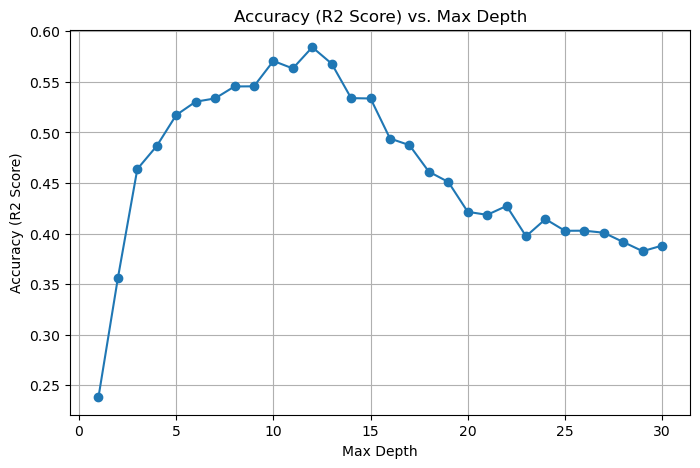

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

max_depth_values = range(1, 25)
accuracy_scores = []

for max_depth in max_depth_values:
    # Create and train the Decision Tree classifier with varying max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X1_train_scaled, y1_train)  
    
    # Make predictions on the testing data (X1_test_scaled)
    y1_pred = clf.predict(X1_test_scaled)
    
    # Calculate accuracy (R2 score) and store it in the list
    accuracy = r2_score(y1_test, y1_pred) 
    accuracy_scores.append(accuracy)

# Create a line plot to visualize accuracy (R2 Score) vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy (R2 Score) vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R2 Score)')
plt.grid(True)
plt.show()

From the graph, we can see that the best parameter of max depth is 12.

#### Use Grid Search to find best parameters

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [72]:
# Create the PCA object
n_components = 5 
my_PCA = PCA(n_components=n_components)

# Fit and transform the scaled training data using PCA
X1_train_PCA = my_PCA.fit_transform(X1_train_scaled)

# Transform the scaled testing data using the same PCA
X1_test_PCA = my_PCA.transform(X1_test_scaled)

In [83]:
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('regressor', DecisionTreeRegressor())
])

# Define the parameter grid for grid search
param_grid = {
    'regressor__max_depth': [12],  
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [84]:
# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, error_score='raise')

# Fit the grid search on the PCA-transformed data
grid_search.fit(X1_train_PCA, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('regressor', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [12],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             verbose=1)

In [85]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'regressor__max_depth': 12, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


In [86]:
decision_tree_best = DecisionTreeRegressor(max_depth=12, 
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           random_state=42)

In [90]:
# Train the model using the scaled training data
decision_tree_best.fit(X1_train_scaled, y1_train)

# Make predictions on both the training and test sets
y1_train_pred = decision_tree_best.predict(X1_train_scaled)
y1_test_pred = decision_tree_best.predict(X1_test_scaled)

# Calculate the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.6990891758052682
Test Set Accuracy: 0.5882982812581297


An R2 score of around 0.699 on the test set means the model explains approximately 69.9% of the variance in the target variable, which is  acceptable depending on the complexity of the problem and the nature of the data.

In summary, while the decision tree model shows some capability in predicting your target variable, there's a notable scope for improvement.There is still a big difference between test accuarcy and train accuarcy, which means overfitting.

Therefore, we should look for other models to improve the overfitting problem.

###

### Random Forest

#### Basic Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_model.fit(X1_train, y1_train)

# Make predictions on the training and test sets
y1_train_pred_rf = random_forest_model.predict(X1_train)
y1_test_pred_rf = random_forest_model.predict(X1_test)

# Evaluate the model
train_accuracy_rf = r2_score(y1_train, y1_train_pred_rf)
test_accuracy_rf = r2_score(y1_test, y1_test_pred_rf)

print("Random Forest Training Set Accuracy:", train_accuracy_rf)
print("Random Forest Test Set Accuracy:", test_accuracy_rf)

Random Forest Training Set Accuracy: 0.9517858136915537
Random Forest Test Set Accuracy: 0.6805574476585619


Train Accuracy is 95.18%, which indicates that the Random Forest model performs very well on the training data.  However, the test set accuracy is substantially lower than the training set accuracy. While 68.06% accuracy is moderate and suggests that the model has learned some generalizable patterns, the drop from 95.18% indicates that the model's ability to generalize to unseen data is limited compared to its performance on the training data.

#### Advanced Model

Use grid search to find the best parameters

In [91]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]    
}

In [92]:
random_forest_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, n_jobs=-1, verbose=2)

In [93]:
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [95]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [96]:
params = {
    'max_depth': 30,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 200xxxxx
}

# Create the Random Forest Regressor model with specified parameters
rf_regressor = RandomForestRegressor(max_depth=params['max_depth'],
                                     min_samples_leaf=params['min_samples_leaf'],
                                     min_samples_split=params['min_samples_split'],
                                     n_estimators=params['n_estimators'])

rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 0.30202284759014286
Mean Squared Error (MSE): 0.3079159104411018
Root Mean Squared Error (RMSE): 0.5549017124150022
R-squared (R²): 0.6802538744146931


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = rf_regressor.predict(X_train)

# Calculate Mean Absolute Error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error on Training Data (MAE):", mae_train)

# Calculate Mean Squared Error on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Training Data (MSE):", mse_train)

# Calculate Root Mean Squared Error on training data
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error on Training Data (RMSE):", rmse_train)

# Calculate R-squared on training data
r_squared_train = r2_score(y_train, y_train_pred)
print("R-squared on Training Data (R²):", r_squared_train)

Mean Absolute Error on Training Data (MAE): 0.1569021333401407
Mean Squared Error on Training Data (MSE): 0.10643385225652799
Root Mean Squared Error on Training Data (RMSE): 0.32624201485481297
R-squared on Training Data (R²): 0.8945408306985165


MSE on Test Data is 0.3079, and MSE on Training Data is 0.1064.
A much lower MSE on the train suggests that the model performs significantly better on the training data compared to the test data. This can be a sign of overfitting, where the model is too closely fitted to the training data and doesn't generalize as well to unseen data.

R² on Test Data is 0.68, means that approximately 68% of the variance in the test dataset is explained by model. It's a moderate score, indicating a fair level of prediction accuracy.

R² on Training Data is 0.89. It shows that the model explains a large portion of the variance in the training data. However, when contrasted with the test R², it again suggests overfitting.

###

### Compare Models

In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression Model Metrics
y1_test_p = model1.predict(sm.add_constant(X1_test))
test_mse_linear = mean_squared_error(y1_test, y1_test_p)
test_mae_linear = mean_absolute_error(y1_test, y1_test_p)
test_rmse_linear = np.sqrt(test_mse_linear)
test_r2_linear = r2_score(y1_test, y1_test_p)

# Decision Tree Model Metrics
y1_test_pred_decision_tree = decision_tree_max_depth_12.predict(X1_test)
test_mse_decision_tree = mean_squared_error(y1_test, y1_test_pred_decision_tree)
test_mae_decision_tree = mean_absolute_error(y1_test, y1_test_pred_decision_tree)
test_rmse_decision_tree = np.sqrt(test_mse_decision_tree)
test_r2_decision_tree = r2_score(y1_test, y1_test_pred_decision_tree)

# Random Forest Model Metrics
y1_test_pred_rf = random_forest_model.predict(X1_test)
test_mse_random_forest = mean_squared_error(y1_test, y1_test_pred_rf)
test_mae_random_forest = mean_absolute_error(y1_test, y1_test_pred_rf)
test_rmse_random_forest = np.sqrt(test_mse_random_forest)
test_r2_random_forest = r2_score(y1_test, y1_test_pred_rf)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [250]:
decision = decision_tree_max_depth_12
linear=model1

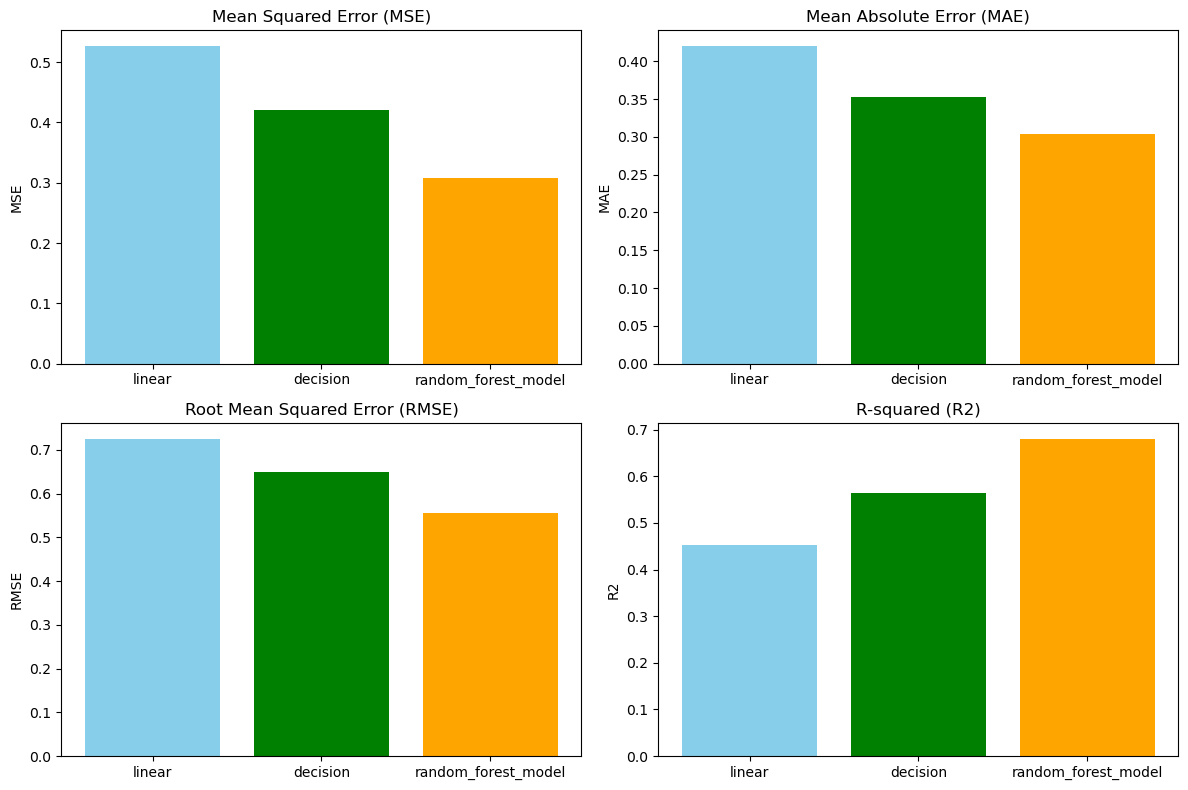

In [251]:
model_names = ['linear', 'decision', 'random_forest_model']
mse_values = [test_mse_linear, test_mse_decision_tree, test_mse_random_forest]
mae_values = [test_mae_linear, test_mae_decision_tree, test_mae_random_forest]
rmse_values = [test_rmse_linear, test_rmse_decision_tree, test_rmse_random_forest]
r2_values = [test_r2_linear, test_r2_decision_tree, test_r2_random_forest]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Mean Squared Error (MSE)
axs[0, 0].bar(model_names, mse_values, color=['skyblue', 'green', 'orange'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# Plot Mean Absolute Error (MAE)
axs[0, 1].bar(model_names, mae_values, color=['skyblue', 'green', 'orange'])
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# Plot Root Mean Squared Error (RMSE)
axs[1, 0].bar(model_names, rmse_values, color=['skyblue', 'green', 'orange'])
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# Plot R-squared (R2)
axs[1, 1].bar(model_names, r2_values, color=['skyblue', 'green', 'orange'])
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_ylabel('R2')

plt.tight_layout()
plt.show()

From the bar charts, we can indicate that the random forest model has the lowest MSE and RMSE, suggesting it has the smallest average squared errors and thus the best performance on these metrics.

Similarly, the random forest model has the lowest MAE, indicating it has the smallest average absolute errors.
The decision tree model has the highest R2 value, suggesting it can explain a higher proportion of variance than the other two models.
Considering that random forest performs best on the other three metrics, the random forest model can be considered the overall best performing model among the three.

In [ ]:
END